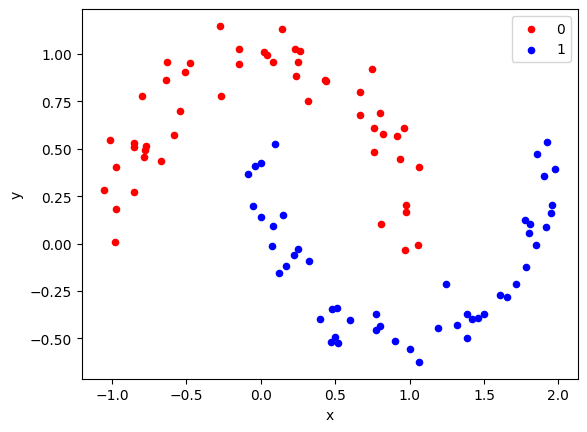

In [1]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.1)
# scatter plot, dots colored by class value
def plot_results(X, y):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = pyplot.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    pyplot.show()
plot_results(X,y)

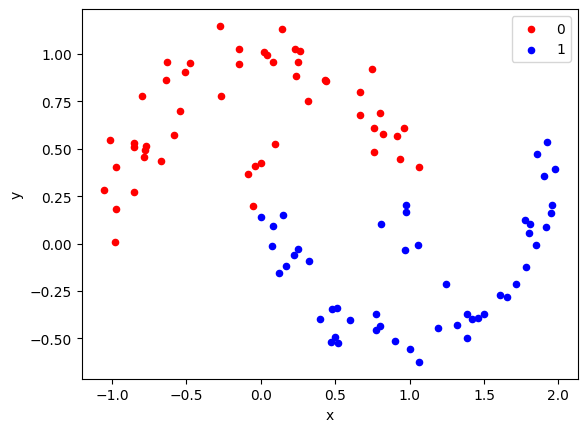

In [2]:
# svm linear
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

linearSVM = SVC(kernel='linear')

linearSVM.fit(X, y)

plot_results(X, linearSVM.predict(X))

{'C': 0.2, 'gamma': 3.0, 'kernel': 'rbf'}


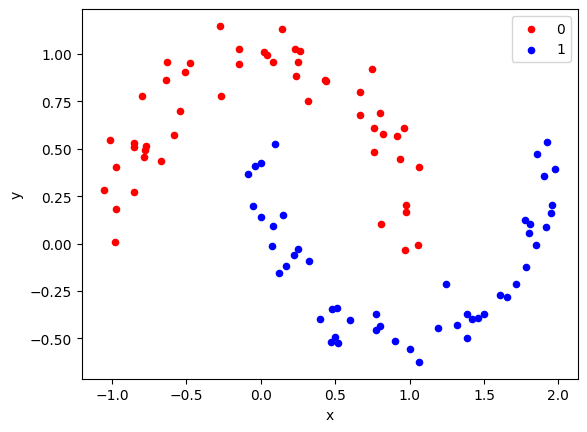

In [3]:
# svm rbf
import numpy as np
parameters = {'kernel': ['rbf'], 'C':np.linspace(0.1, 10, 100), 'gamma':np.linspace(0.05, 5, 100)}

rbf = SVC()
clf = GridSearchCV(estimator=rbf, param_grid=parameters, scoring='accuracy', n_jobs=-1)

clf.fit(X, y)
print(clf.best_params_)

plot_results(X, clf.predict(X))

{'degree': 3, 'kernel': 'poly'}


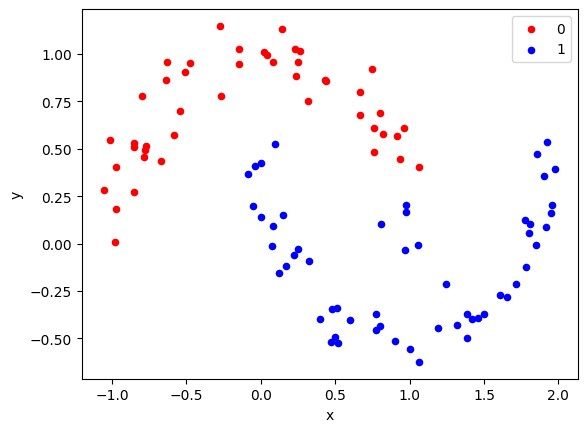

In [4]:
# svm poly
parameters = {'kernel': ['poly'], 'degree':[x for x in range(1,10)]}

rbf = SVC()
clf = GridSearchCV(estimator=rbf, param_grid=parameters, scoring='accuracy', n_jobs=-1)

clf.fit(X, y)
print(clf.best_params_)
plot_results(X, clf.predict(X))

{'alpha': 0.01, 'fit_intercept': True}


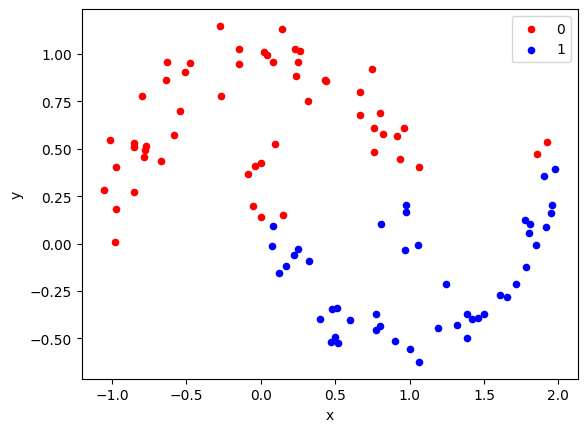

In [5]:
# linear regression
from sklearn.linear_model import SGDClassifier

parameters = {'fit_intercept':[True, False], 'alpha':[10**(-x) for x in range(7)]}

reg = SGDClassifier()
clf = GridSearchCV(estimator=reg, param_grid=parameters, scoring='accuracy', n_jobs=-1)

clf.fit(X, y)
print(clf.best_params_)
plot_results(X, clf.predict(X))

{'poly__degree': 4, 'reg__alpha': 0.0001, 'reg__fit_intercept': True}


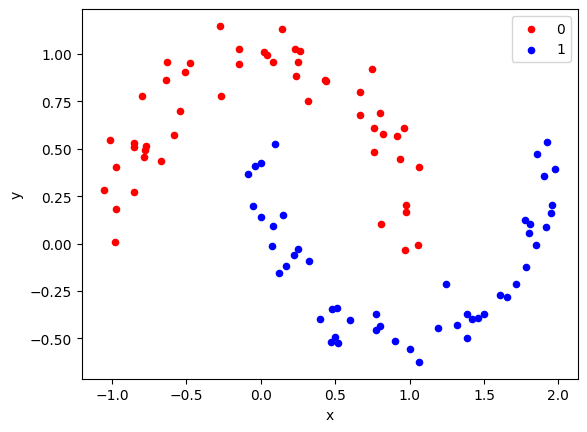

In [6]:
# poly features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

parameters = {'poly__degree': [x for x in range(1,15)],
              'reg__fit_intercept': [True, False],
              'reg__alpha': [10**(-x) for x in range(7)]}

poly = PolynomialFeatures(include_bias=False)
reg = SGDClassifier()
pipeline = Pipeline(steps=[('poly', poly), ('reg', reg)])

grid_search = GridSearchCV(estimator=pipeline, param_grid=parameters, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

print(grid_search.best_params_)
plot_results(X, grid_search.predict(X))